# Experiment Results for UMLP & UCNN
This notebook analyses / plots the results for the Unification MLP and Unification CNN networks.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's accumulate the data into a csv from raw log files:

In [11]:
%%bash
for type in umlp ucnn; do
  python3 utils/umlp_ucnn_process_logs.py -hd "$type"_result/*_log.json > "$type"_results.csv
  python3 utils/umlp_ucnn_process_logs.py "$type"_result/*_log.json >> "$type"_results.csv
done

In [12]:
# Load respective data
df_umlp = pd.read_csv("umlp_results.csv")
# UMLP has an extra length column which is fixed and we don't need
del df_umlp['length']
df_ucnn = pd.read_csv("ucnn_results.csv")
df = pd.concat([df_umlp, df_ucnn])

# The dataframe contain the training results at each iteration with experiment details
df.sample(5)

,name,symbols,invariants,embed,tsize,fold,main/uloss,main/uacc,main/igloss,main/igacc,...,test/main/uloss,test/main/uacc,test/main/igloss,test/main/igacc,test/main/oloss,test/main/oacc,test/main/vloss,epoch,iteration,elapsed_time
6646,umlp,8,3,16,0,3,0.047555,0.995313,0.008140,1.0,...,0.044981,0.996094,0.008150,1.0,3.556514,0.348534,-41.108738,11,470,74.481721
5314,umlp,8,2,16,50,1,0.008430,1.000000,0.002795,1.0,...,0.647507,0.904080,0.002783,1.0,5.300572,0.365451,-71.895004,368,1150,121.196892
2587,ucnn,8,1,32,0,2,0.003840,1.000000,0.001348,1.0,...,0.003816,1.000000,0.001295,1.0,18.344798,0.298889,-55.204266,53,1880,176.547535
5641,umlp,8,2,16,50,3,0.014220,1.000000,0.007956,1.0,...,0.395911,0.918403,0.007917,1.0,2.728086,0.434028,-23.695614,134,420,44.281215
9052,umlp,8,4,16,50,0,0.021420,1.000000,0.010894,1.0,...,0.190396,0.947669,0.010769,1.0,2.661708,0.466456,-66.842484,169,530,88.435272


In [13]:
# We'll create some extra computed columns for convenience
df['unification'] = ~df['name'].str.contains('base', regex=False) # Do we have unification enabled?
df['type'] = np.where(df['name'].str.contains('cnn'), 'cnn', 'mlp') # What network type is this?
df['test/acc'] = df['test/main/uacc'].where(df.unification, df['test/main/oacc']) # Which test accuracy to pick?
df['test/er'] = 1-df['test/acc'] # Test error rate
df.sample(5)

,name,symbols,invariants,embed,tsize,fold,main/uloss,main/uacc,main/igloss,main/igacc,...,test/main/oloss,test/main/oacc,test/main/vloss,epoch,iteration,elapsed_time,unification,type,test/acc,test/er
227,basemlp,8,1,16,0,1,1.414578,0.546875,0.998553,0.75,...,0.648964,0.733865,0.000000,6,280,22.826163,False,mlp,0.733865,0.266135
2883,ucnn,8,1,32,0,4,0.005624,1.000000,0.001698,1.00,...,13.352158,0.260313,-24.711838,24,840,78.273243,True,cnn,1.000000,0.000000
9049,ucnn,8,4,32,50,0,0.050282,1.000000,0.002080,1.00,...,3.879419,0.252500,-61.673233,181,500,84.384811,True,cnn,0.651250,0.348750
126,basemlp,8,1,16,0,0,3.069554,0.537500,0.037825,1.00,...,0.219164,0.932858,0.000000,29,1270,104.226328,False,mlp,0.932858,0.067142
3563,ucnn,8,1,32,50,2,0.007735,1.000000,0.001371,1.00,...,18.442134,0.268080,-48.854187,603,1640,158.106584,True,cnn,0.640268,0.359732


## Does unification help with generalisation?
We will plot the test accuracy over iterations to see if unification helps with generalisation. We will take a single invariant case. Note base line also has single invariant although it doesn't use it, it is required to check if training the baseline for some reason also improves unification haphazardly.

In [14]:
# Filter data to get single invariants
df1 = df[(df.invariants == 1)]

# Adjust column names and types for plotting
df1['type'] = df1['type'].str.upper()
df1['unification'] = np.where(df1.unification, 'Yes', 'No')
df1['tsize'] = np.where(df1.tsize == 0, '≤ 1000', '≤ 50')
df1 = df1.rename(columns={'unification': 'Unification', 'tsize': 'Training Size'})
df1.sample(5)

/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

,name,symbols,invariants,embed,Training Size,fold,main/uloss,main/uacc,main/igloss,main/igacc,...,test/main/oloss,test/main/oacc,test/main/vloss,epoch,iteration,elapsed_time,Unification,type,test/acc,test/er
2319,umlp,8,1,16,≤ 1000,1,0.005467,1.000000,0.000804,1.00,...,7.052432,0.288270,-37.141209,27,1200,98.793114,Yes,MLP,1.000000,0.000000
2914,ucnn,8,1,32,≤ 1000,4,0.000739,1.000000,0.000094,1.00,...,14.431087,0.273889,-34.138733,33,1150,107.132875,Yes,CNN,1.000000,0.000000
2308,umlp,8,1,16,≤ 1000,1,0.006348,1.000000,0.000839,1.00,...,6.717655,0.286968,-33.520084,25,1090,89.698891,Yes,MLP,0.998698,0.001302
318,basemlp,8,1,16,≤ 1000,1,2.181685,0.520312,0.544570,0.75,...,0.205817,0.931839,0.000000,27,1190,97.555837,No,MLP,0.931839,0.068161
1211,basecnn,8,1,32,≤ 50,1,2.275313,0.239063,0.019537,1.00,...,2.601633,0.288569,0.000000,43,120,10.659957,No,CNN,0.288569,0.711431


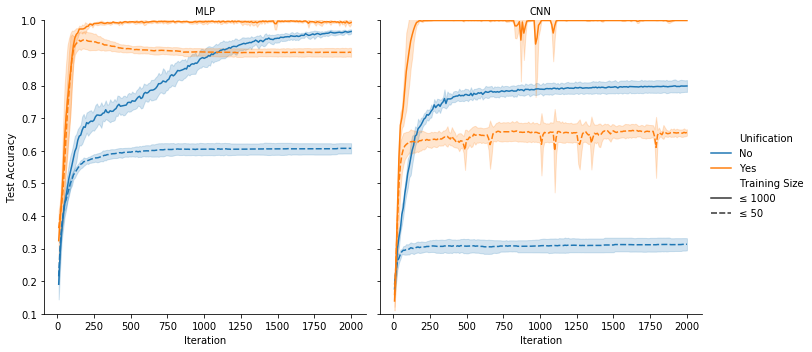

In [15]:
# Plot the test accuracy
g = sns.relplot(x='iteration', y='test/acc', hue='Unification',
                style='Training Size', kind='line', col='type', ci='sd',
                data=df1)
g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Iteration")
plt.ylim(0.1, 1.0)
g.savefig("umlp_ucnn_acc_plot.pdf", bbox_inches='tight')

## What is the effect of having more invariants?
We are now interested in increasing the number of invariants and looking at the change in performance. Since the tasks can be solved with a single invariant already, is there performance benefit of using multiple?

In [16]:
# Let's take only the unification cases
dfu = df[df.unification]

# Fix column names etc. for plotting
dfu['type'] = dfu['type'].str.upper()
dfu['tsize'] = np.where(dfu.tsize == 0, '≤ 1000', '≤ 50')
dfu = dfu.rename(columns={'tsize': 'Training Size'})

dfu.sample(5)

/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,symbols,invariants,embed,Training Size,fold,main/uloss,main/uacc,main/igloss,main/igacc,...,test/main/oloss,test/main/oacc,test/main/vloss,epoch,iteration,elapsed_time,unification,type,test/acc,test/er
7076,ucnn,8,3,32,≤ 50,0,0.013915,1.000000,0.000372,1.0,...,6.057538,0.279092,-73.224182,281,770,106.473787,True,CNN,0.695982,0.304018
3879,umlp,8,1,16,≤ 50,4,0.009680,1.000000,0.002337,1.0,...,4.850043,0.323236,-23.348057,256,800,66.340344,True,MLP,0.895541,0.104459
5799,ucnn,8,2,32,≤ 50,3,0.025238,0.990625,0.000240,1.0,...,11.468364,0.273125,-128.502319,731,2000,232.417754,True,CNN,0.805000,0.195000
5366,umlp,8,2,16,≤ 50,1,0.005649,1.000000,0.001825,1.0,...,6.484947,0.382378,-107.986916,534,1670,176.226578,True,MLP,0.900174,0.099826
5338,ucnn,8,2,32,≤ 50,1,0.054957,0.970313,0.000357,1.0,...,8.556698,0.269063,-90.182281,496,1390,159.324064,True,CNN,0.723125,0.276875


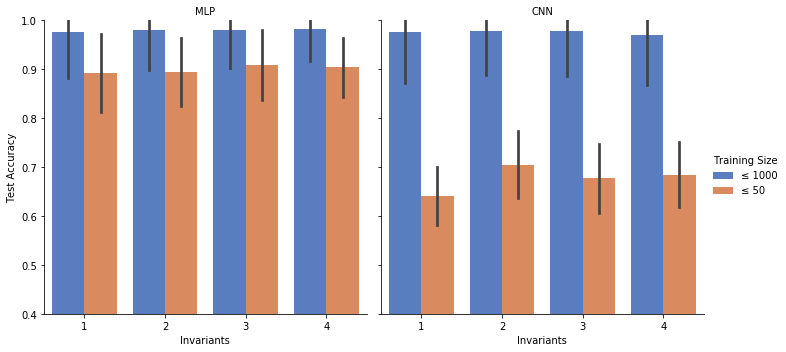

In [17]:
# Plot the test accuracy
g = sns.catplot(x='invariants', y='test/acc', hue='Training Size',
                col='type', kind='bar', ci='sd', data=dfu, palette='muted')
g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Invariants")
plt.ylim(0.4, 1.0)
g.savefig("umlp_ucnn_invs_plot.pdf", bbox_inches='tight')

In [18]:
# And in tabular format
pd.pivot_table(dfu, index='invariants', columns=['type', 'Training Size'],
               values='test/acc', aggfunc=[np.mean, np.std]).round(2)

mean                       std                   
type             CNN          MLP          CNN          MLP      
Training Size ≤ 1000  ≤ 50 ≤ 1000  ≤ 50 ≤ 1000  ≤ 50 ≤ 1000  ≤ 50
invariants                                                       
1               0.98  0.64   0.98  0.89   0.10  0.06   0.09  0.08
2               0.98  0.70   0.98  0.89   0.09  0.07   0.08  0.07
3               0.98  0.68   0.98  0.91   0.09  0.07   0.08  0.07
4               0.97  0.68   0.98  0.90   0.10  0.07   0.07  0.06